In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing dataset
df = pd.read_csv('laptop_price.csv',encoding='latin-1')

Data analysis 

In [4]:
# First five rows of the dataset
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
# Last five rows of the dataset
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,Intel HD Graphics,Windows 10,2.2kg,369.0


In [6]:
# Shape of the dataset
df.shape

(1303, 12)

In [7]:
# Columns present in the dataset
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [8]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [9]:
# Checking missing values
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
# Generating descriptive statistics summary
df.describe().round()

,laptop_ID,Inches,Price_euros
count,1303.0,1303.0,1303.0
mean,660.0,15.0,1124.0
std,381.0,1.0,699.0
min,1.0,10.0,174.0
25%,332.0,14.0,599.0
50%,659.0,16.0,977.0
75%,990.0,16.0,1488.0
max,1320.0,18.0,6099.0


In [11]:
#Turn object data type to int32 and float32
df['Ram'] = df['Ram'].str.replace('GB','').astype('int32')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float32')

In [12]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94


In [13]:
df.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Name: Price_euros, dtype: float64

In [14]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [15]:
#One hot encording
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft'or inpt == 'Xiaomi'or inpt == 'Vero'or inpt == 'Chuwi'or inpt == 'Google'or inpt == 'Fujitsu'or inpt == 'LG'or inpt == 'Huawei':
        return 'Other'
    else:
        return inpt

In [16]:
df['Company'] =df['Company'].apply(add_company)

In [17]:
df['Company'].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: Company, dtype: int64

In [18]:
len(df['Product'].value_counts())

618

In [19]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [21]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [22]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0


In [23]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [24]:
df['cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [25]:
df['cpu_name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [26]:
def set_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other'

In [27]:
df['cpu_name'] = df['cpu_name'].apply(set_processor)

In [28]:
df['cpu_name'].value_counts()

Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: cpu_name, dtype: int64

In [29]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [30]:
df['gpu_name'] = df['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))

In [31]:
df['gpu_name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_name, dtype: int64

In [32]:
df.shape

(1303, 16)

In [33]:
df = df[df['gpu_name'] != 'ARM']

In [34]:
df.shape

(1302, 16)

In [35]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,cpu_name,gpu_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,Intel


In [36]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [37]:
def set_os(inpt):
    if inpt == 'Windows 10' or inpt == 'Windows 7' or inpt == 'Windows 10 S':
        return 'Windows'
    elif inpt == 'macOS' or inpt == 'Mac OS X':
        return 'Mac'
    elif inpt == 'Linux':
        return inpt
    else:
        return 'Other'

In [38]:
df = df.drop(columns=['laptop_ID', 'Inches', 'Product', 'ScreenResolution', 'Cpu', 'Gpu'])

In [39]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,cpu_name,gpu_name
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,Intel Core i5,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,Intel Core i5,Intel


In [40]:
df = pd.get_dummies(df)

In [41]:
df.head(2)

,Ram,Weight,Price_euros,Touchscreen,Ips,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Windows 7,OpSys_macOS,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,1339.69,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,8,1.34,898.94,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


Model Building and Selection

In [42]:
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [43]:
X

,Ram,Weight,Touchscreen,Ips,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,...,OpSys_Windows 7,OpSys_macOS,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,8,1.34,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,8,1.86,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,16,1.83,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,8,1.37,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1299,16,1.30,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1300,2,1.50,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1301,6,2.19,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [44]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1302, dtype: float64

Divide dataset into training and testing set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [46]:
X_train.shape, X_test.shape

((976, 36), (326, 36))

Model training

In [47]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

Check the model Accuracy

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> 0.6976003883380999
Lasso() --> 0.6946429740382785
DecisionTreeRegressor() --> 0.6713299408818767
RandomForestRegressor() --> 0.7388427039223944


Hyperparameter tunning

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_

best_model.score(X_test, y_test)

C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
 

C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
 

C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
 

C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Githma Pramesh\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
 

0.7642858289336452

In [50]:
X_test.columns

Index(['Ram', 'Weight', 'Touchscreen', 'Ips', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Other', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'cpu_name_AMD',
       'cpu_name_Intel Core i3', 'cpu_name_Intel Core i5',
       'cpu_name_Intel Core i7', 'cpu_name_Other', 'gpu_name_AMD',
       'gpu_name_Intel', 'gpu_name_Nvidia'],
      dtype='object')

Save model

In [51]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

Visualization

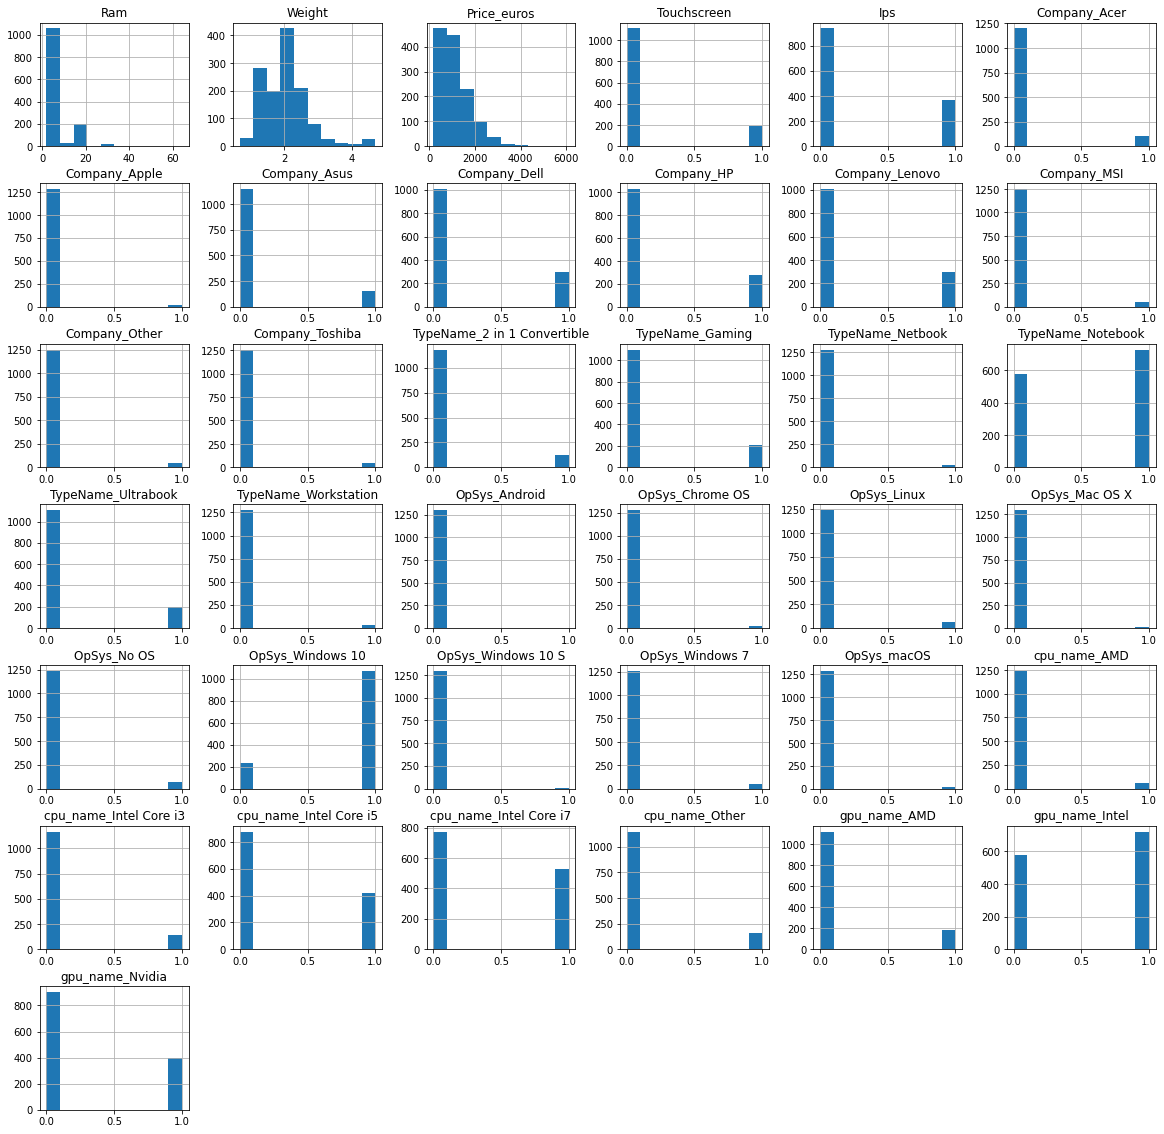

In [52]:
#Visualising selected teatures by target:
df.hist(figsize=(20,20))
plt.show()

In [53]:
hue = 'Price_euros'

In [54]:
vars = ['Company','Product','Ram','OpSys','Weight']

In [55]:
sns.pairplot=(df, hue, vars)

In [56]:
sns.pairplot

(      Ram  Weight  Price_euros  Touchscreen  Ips  Company_Acer  Company_Apple  \
 0       8    1.37      1339.69            0    1             0              1   
 1       8    1.34       898.94            0    0             0              1   
 2       8    1.86       575.00            0    0             0              0   
 3      16    1.83      2537.45            0    1             0              1   
 4       8    1.37      1803.60            0    1             0              1   
 ...   ...     ...          ...          ...  ...           ...            ...   
 1298    4    1.80       638.00            1    1             0              0   
 1299   16    1.30      1499.00            1    1             0              0   
 1300    2    1.50       229.00            0    0             0              0   
 1301    6    2.19       764.00            0    0             0              0   
 1302    4    2.20       369.00            0    0             0              0   
 
       Company

In [57]:
sns.pairplot=(df, hue, vars)

Visualising selected 

<AxesSubplot:>

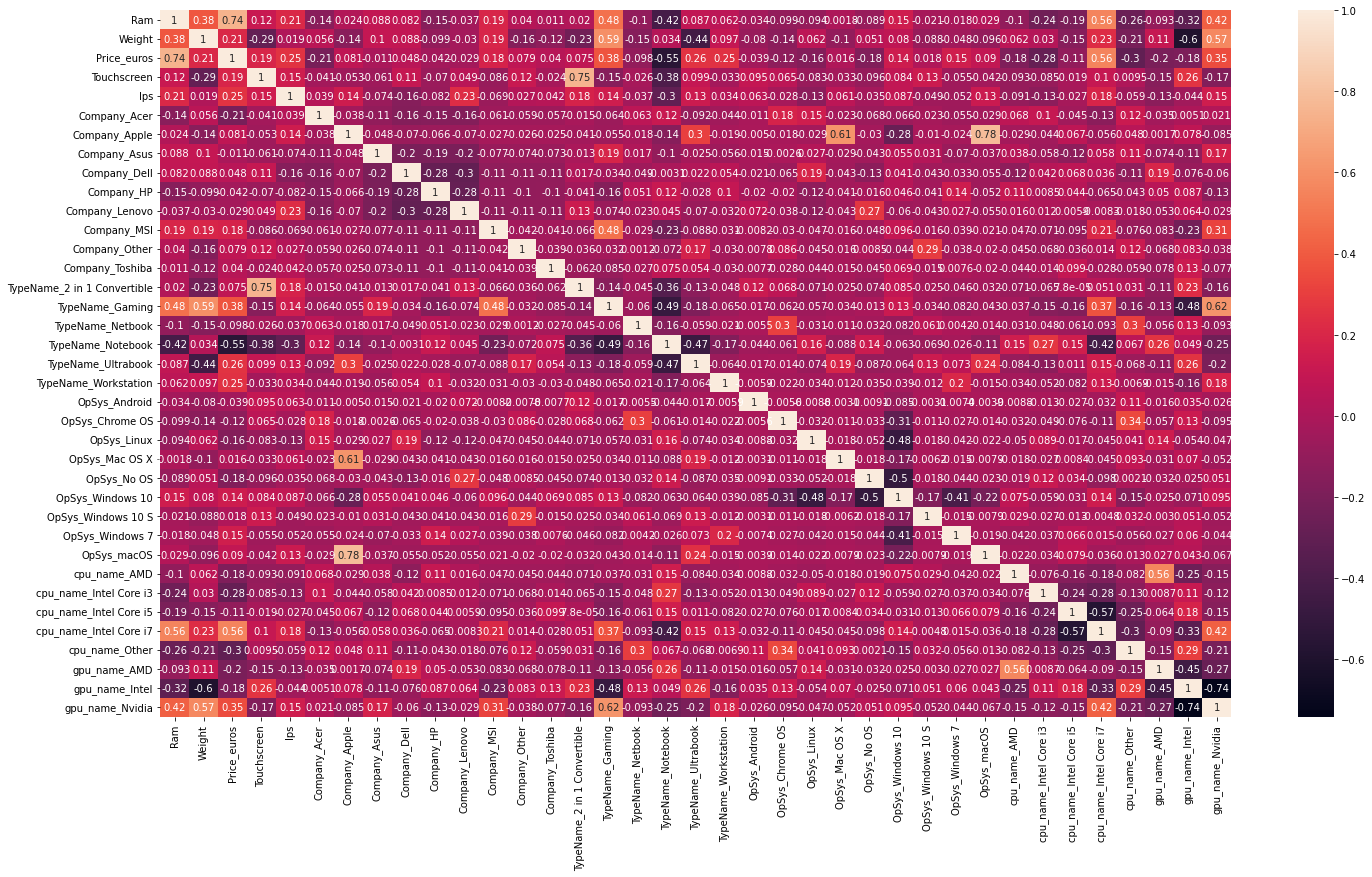

In [58]:
plt.figure(figsize=(24,13))
sns.heatmap(df.corr(), annot=True)

In [59]:
import sklearn.metrics as sm

In [60]:
from sklearn.ensemble import RandomForestClassifier
